# Logistic Regression

### Setup

In [36]:
import pandas as pd
import altair as alt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay


### Import data

In [37]:

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/resume.csv')
df = df[['received_callback', 'honors', 'job_city', 'years_experience', 'military', 'has_email_address', 'race', 'gender']]

### Data structure

In [38]:
df

,received_callback,honors,job_city,years_experience,military,has_email_address,race,gender
0,0,0,Chicago,6,0,0,white,f
1,0,0,Chicago,6,1,1,white,f
2,0,0,Chicago,6,0,0,black,f
3,0,0,Chicago,6,0,1,black,f
4,0,0,Chicago,22,0,1,white,f
...,...,...,...,...,...,...,...,...
4865,0,0,Boston,1,0,0,black,f
4866,0,0,Boston,6,0,0,black,f
4867,0,0,Boston,8,0,1,white,m
4868,0,0,Boston,2,1,1,black,f


In [39]:
df['received_callback'].value_counts()

0    4478
1     392
Name: received_callback, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   received_callback  4870 non-null   int64 
 1   honors             4870 non-null   int64 
 2   job_city           4870 non-null   object
 3   years_experience   4870 non-null   int64 
 4   military           4870 non-null   int64 
 5   has_email_address  4870 non-null   int64 
 6   race               4870 non-null   object
 7   gender             4870 non-null   object
dtypes: int64(5), object(3)
memory usage: 304.5+ KB


### Variable lists

In [41]:
# define outcome variable as y_label
y_label = 'received_callback'

# select features
features = 'honors'

# create feature data
X = df[[features]]

# create response
y = df[y_label]

### Data split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Model

### Select model

In [43]:
clf = LogisticRegression()

### Training & validation

In [44]:
# cross-validation with 5 folds
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

In [45]:
# store cross-validation scores
df_scores = pd.DataFrame({"logistic": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,logistic
1,0.919355
2,0.919355
3,0.919355
4,0.917889
5,0.919236


In [46]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("logistic", aggregate="mean", title="F1")
)

alt.Chart(...)

In [47]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
logistic,5.0,0.919038,0.000645,0.917889,0.919236,0.919355,0.919355,0.919355


### Fit model

In [48]:
# Fit the model to the complete training data
clf.fit(X_train, y_train)

LogisticRegression()

### Coefficients

In [49]:
clf.intercept_

array([-2.48157625])

In [50]:
clf.coef_

array([[0.76660242]])

### Evaluation on test set

In [51]:
y_pred = clf.predict(X_test)

In [52]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.920602327173169

### Confusion matrix

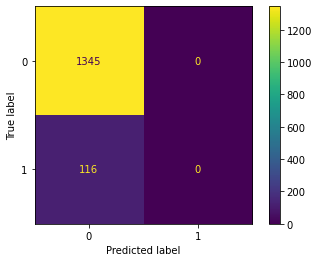

In [53]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Classification report

In [54]:
print(classification_report(y_test, y_pred, target_names=['0', '1'], zero_division=0))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1345
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461



### ROC Curve

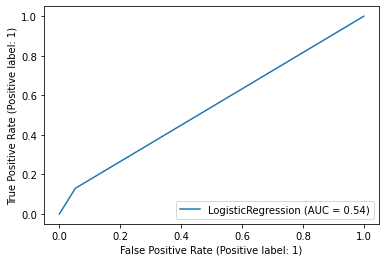

In [55]:

RocCurveDisplay.from_estimator(clf, X_test, y_test);

### AUC Score

In [56]:
roc_auc_score(y_test, clf.decision_function(X_test))

0.5386328675810794

Option 2 to obtain AUC:

In [57]:
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.5386328675810794

### Change threshold

Use specific threshold

In [58]:
# obtain probabilities
pred_proba = clf.predict_proba(X_test)

In [59]:
# set threshold to 0.25

df_25 = pd.DataFrame({'y_pred': pred_proba[:,1] > .25})

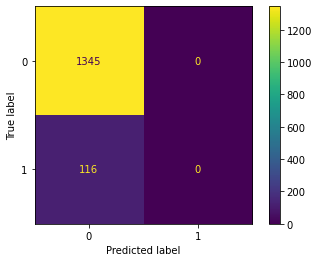

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, df_25['y_pred']);

### Classification report

In [61]:
print(classification_report(y_test, df_25['y_pred'], target_names=['0', '1'], zero_division=0))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1345
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461

